# Exercise 4: Batch homology grouping and downstream QC analyses

**Author**: John Hodge

Following on the same strategy we employed in exercises 1 and 2 of first learning how to employ `acute` on a single image and then scaling up to batch image data we will now take what we have learned in exercise 3 for homology grouping with the `starscape` and `constella` workflow and scale this method up for use on batch image data.  Following the generation of serial ID number homology groups and assigning them to our acute plms we will then assay the accuracy of these results through the use of a Quality Control (QC) test for `constella` and discuss how these outputs should be interpreted.

To begin lets load the libraries and other input files we'll need to proceed...

In [1]:
%matplotlib widget
# Change inline to widget for interactive plots
from plantcv import plantcv as pcv
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
import pandas as pd
from skimage import img_as_ubyte

In [2]:
# PlantCV adjustable global parameters
pcv.params.debug = "plot"
pcv.params.text_size = 20
pcv.params.text_thickness = 10
pcv.params.line_thickness = 14
# Adjust plot sizes
pcv.params.dpi = 125

In [3]:
# Workflow parameters
win = 25
thresh = 90

path = './imgs'
days = range(10, 14)
name_prefix = 'B100_rep1_d'

outpath = './output'
os.makedirs(outpath, exist_ok=True)
outfile_prefix = os.path.join(outpath, 'B100_test')

Now with our libraries loaded and initial parameters assigned let us begin by running a batch workflow with `acute` to generate our list of plms as a landmark dataframe.



/Users/nfahlgren/GitHub/plantcv/plantcv/plantcv/spectral_index/spectral_index.py:270: RuntimeWarning: invalid value encountered in true_divide
  r = red.astype(np.float32) / total
/Users/nfahlgren/GitHub/plantcv/plantcv/plantcv/spectral_index/spectral_index.py:271: RuntimeWarning: invalid value encountered in true_divide
  g = green.astype(np.float32) / total
/Users/nfahlgren/GitHub/plantcv/plantcv/plantcv/spectral_index/spectral_index.py:272: RuntimeWarning: invalid value encountered in true_divide
  b = blue.astype(np.float32) / total


Fusing contour edges
route C
Landmark site: 1672, Start site: 1650, Term. site: 18
Landmark point indices: [1672]
Starting site indices: [1650]
Termination site indices: [18]
route C
Landmark site: 312, Start site: 289, Term. site: 332
Landmark point indices: [1672, 312]
Starting site indices: [1650, 289]
Termination site indices: [18, 332]
route C
Landmark site: 525, Start site: 501, Term. site: 549
Landmark point indices: [1672, 312, 525]
Starting site indices: [1650, 289, 501]
Termination site indices: [18, 332, 549]
route C
Landmark site: 832, Start site: 817, Term. site: 840
Landmark point indices: [1672, 312, 525, 832]
Starting site indices: [1650, 289, 501, 817]
Termination site indices: [18, 332, 549, 840]
route C
Landmark site: 917, Start site: 893, Term. site: 940
Landmark point indices: [1672, 312, 525, 832, 917]
Starting site indices: [1650, 289, 501, 817, 893]
Termination site indices: [18, 332, 549, 840, 940]
route C
Landmark site: 1038, Start site: 1004, Term. site: 1061

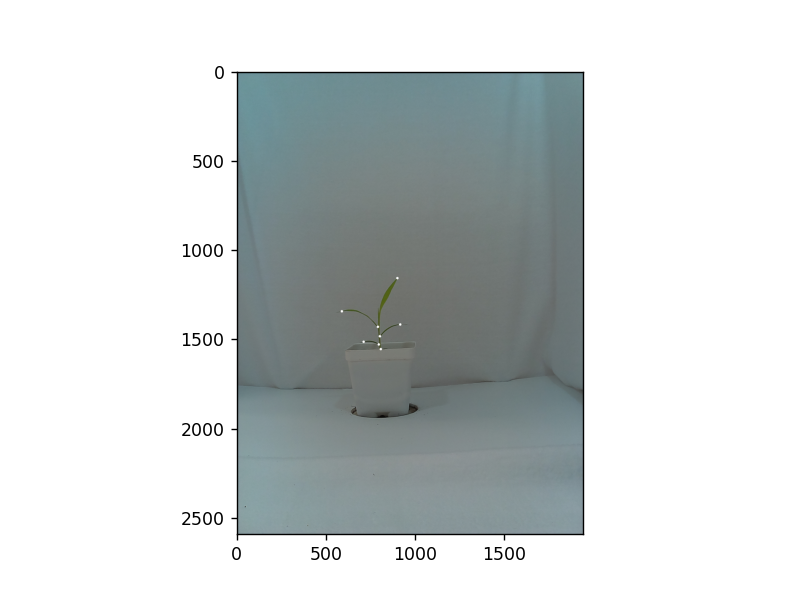

    landmark number: 8


Fusing contour edges
route C
Landmark site: 1947, Start site: 1925, Term. site: 17
Landmark point indices: [1947]
Starting site indices: [1925]
Termination site indices: [17]
route C
Landmark site: 258, Start site: 234, Term. site: 282
Landmark point indices: [1947, 258]
Starting site indices: [1925, 234]
Termination site indices: [17, 282]
route C
Landmark site: 396, Start site: 373, Term. site: 420
Landmark point indices: [1947, 258, 396]
Starting site indices: [1925, 234, 373]
Termination site indices: [17, 282, 420]
route C
Landmark site: 581, Start site: 557, Term. site: 602
Landmark point indices: [1947, 258, 396, 581]
Starting site indices: [1925, 234, 373, 557]
Termination site indices: [17, 282, 420, 602]
route C
Landmark site: 792, Start site: 770, Term. site: 815
Landmark point indices: [1947, 258, 396, 581, 792]
Starting site indices: [1925, 234, 373, 557, 770]
Termination site indices: [17, 282, 420, 602, 815]
route C
Landmark site: 1097, Start site: 1082, Term. site: 1111

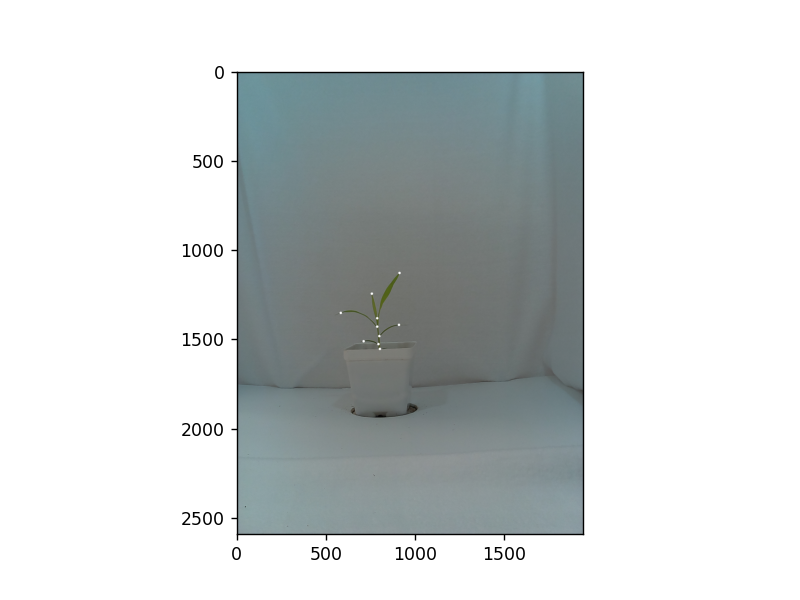

    landmark number: 10


Fusing contour edges
route C
Landmark site: 0, Start site: 1678, Term. site: 24
Landmark point indices: [0]
Starting site indices: [1678]
Termination site indices: [24]
route C
Landmark site: 272, Start site: 248, Term. site: 291
Landmark point indices: [0, 272]
Starting site indices: [1678, 248]
Termination site indices: [24, 291]
route C
Landmark site: 488, Start site: 467, Term. site: 510
Landmark point indices: [0, 272, 488]
Starting site indices: [1678, 248, 467]
Termination site indices: [24, 291, 510]
route C
Landmark site: 797, Start site: 780, Term. site: 809
Landmark point indices: [0, 272, 488, 797]
Starting site indices: [1678, 248, 467, 780]
Termination site indices: [24, 291, 510, 809]
route C
Landmark site: 876, Start site: 852, Term. site: 900
Landmark point indices: [0, 272, 488, 797, 876]
Starting site indices: [1678, 248, 467, 780, 852]
Termination site indices: [24, 291, 510, 809, 900]
route C
Landmark site: 984, Start site: 955, Term. site: 1007
Landmark point indi

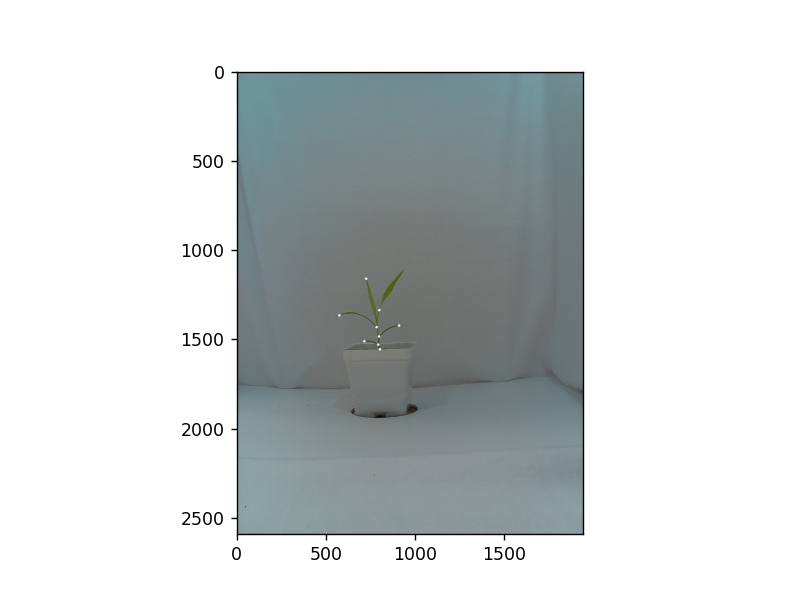

    landmark number: 9


Fusing contour edges
route C
Landmark site: 0, Start site: 2127, Term. site: 21
Landmark point indices: [0]
Starting site indices: [2127]
Termination site indices: [21]
route C
Landmark site: 341, Start site: 318, Term. site: 361
Landmark point indices: [0, 341]
Starting site indices: [2127, 318]
Termination site indices: [21, 361]
route C
Landmark site: 550, Start site: 529, Term. site: 573
Landmark point indices: [0, 341, 550]
Starting site indices: [2127, 318, 529]
Termination site indices: [21, 361, 573]
route C
Landmark site: 886, Start site: 855, Term. site: 910
Landmark point indices: [0, 341, 550, 886]
Starting site indices: [2127, 318, 529, 855]
Termination site indices: [21, 361, 573, 910]
route C
Landmark site: 1071, Start site: 1048, Term. site: 1095
Landmark point indices: [0, 341, 550, 886, 1071]
Starting site indices: [2127, 318, 529, 855, 1048]
Termination site indices: [21, 361, 573, 910, 1095]
route C
Landmark site: 1191, Start site: 1176, Term. site: 1211
Landmark po

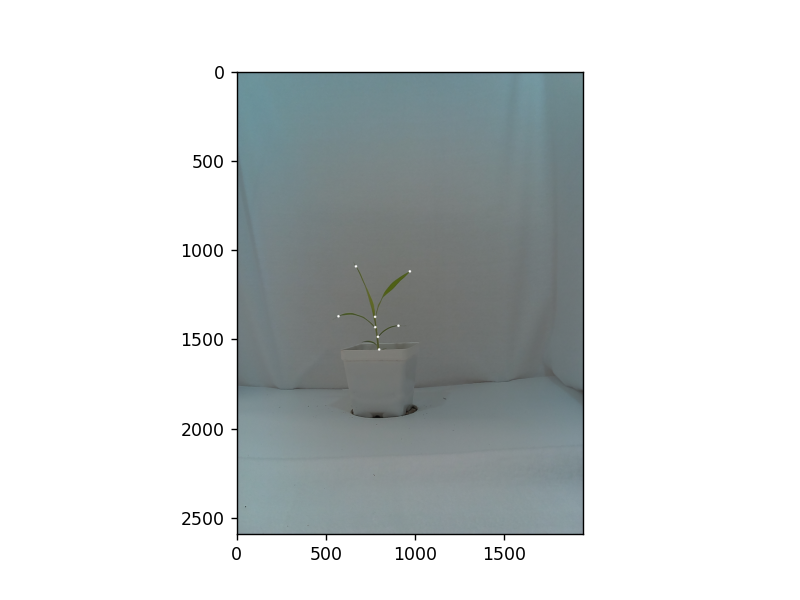

    landmark number: 8


In [4]:
landmark_output=[['group', 'plmname', 'filename', 'plm_x', 'plm_y', 'SS_x', 'SS_y', 'TS_x', 'TS_y', 'CC_ratio']]
for day in days:
    # Turn off debugging outputs for most steps to avoid a huge amount of output
    pcv.params.debug = None
    # 1. Reading our image into the environment
    img, imgpath, imgname = pcv.readimage(filename=os.path.join(path, f"{name_prefix}{day}.jpg"))
    
    # 2. Convert the RGB image into an Excess Green Index image
    egi = pcv.spectral_index.egi(rgb_img=img)
    
    # 3. Threshold the EGI image to create a binary mask
    mask = pcv.threshold.binary(gray_img=img_as_ubyte(egi.array_data), threshold=40)
    
    # 3. Threshold the EGI image to create a binary mask
    mask = pcv.threshold.binary(gray_img=img_as_ubyte(egi.array_data), threshold=40)
    
    # 4. Find largest contour of subject (outer boundary of subject)
    roi = pcv.roi.rectangle(img=img, x=500, y=500, h=1100, w=800)
    kept_mask = pcv.roi.filter(mask=mask, roi=roi, roi_type="largest")
    
    # 5. Extracting pseudo-landmarks from the plant contours
    # Turn debugging back on for acute
    pcv.params.debug = "plot"
    homolog_pts, homolog_start, homolog_stop, homolog_cc, chain, verbose = pcv.homology.acute(img=img, mask=kept_mask,
                                                                                              win=win, threshold=thresh)
    print(f'    landmark number: {len(homolog_pts)}')

    for h in range(0, len(homolog_pts)):
        landmark_output.append([None, f"{name_prefix}{day}_plm{h+1}", f"{name_prefix}{day}", homolog_pts[h][0][0], homolog_pts[h][0][1], 
                                homolog_start[h][0][0], homolog_start[h][0][1], homolog_stop[h][0][0], homolog_stop[h][0][1], homolog_cc[h],])

# # Convert out output to a pandas dataframe for ease of use hereafter...
landmark_pandas = pd.DataFrame(landmark_output[1:len(landmark_output)], columns=landmark_output[0][0:11])

Before we continue lets check our landmarks once more to ensure we'll have what we need to run our homology grouping workflow...

In [5]:
landmark_pandas.head()

group             plmname       filename  plm_x  plm_y  SS_x  SS_y  TS_x  \
0  None  B100_rep1_d10_plm1  B100_rep1_d10    898   1156   888  1178   881   
1  None  B100_rep1_d10_plm2  B100_rep1_d10    789   1429   791  1406   775   
2  None  B100_rep1_d10_plm3  B100_rep1_d10    587   1342   610  1336   611   
3  None  B100_rep1_d10_plm4  B100_rep1_d10    794   1528   797  1513   786   
4  None  B100_rep1_d10_plm5  B100_rep1_d10    709   1513   733  1509   732   

   TS_y  CC_ratio  
0  1173     255.0  
1  1411       0.0  
2  1339     255.0  
3  1522       0.0  
4  1511     255.0

In [6]:
landmark_pandas.to_csv("plms_annotated.csv", index=True)

Provided the head of our table loaded in properly we're now ready to begin a batch run of our homology pipeline which follows the same structure as our previous exercise utilizing `starscape` and `constella`. Note that we have left out `space` from this workflow, studies of this pipelines accuracy have suggested that this function isn't essential for generating tangible improvements in homology grouping.  As such this workflow of parsing segmented morphological data directly into `starscape` is considered the present best practice of this approach. Notice how our groups within `landmark_pandas` are universally assigned to 'None'? On the other side of this code block we should see the results of transfering group IDs from paired frames to this original dataframe resulting in forthcoming changes to this columns values.  Let's get started! 


######################################################
Beginning next iteration for days 10 and 11
Running StarScape...
Eigenvalues:  [3.75112097 2.74606436 0.90593858 0.00508506] 


Var. Explained:  [0.50610362 0.37050075 0.12222981 0.00068608] 


Cumul. Var. Explained:  [0.50610362 0.87660437 0.99883418 0.99952026] 


2  components sufficiently informative


/var/folders/w8/r9_f9vbx64x2_6pgqn8mdm9r0000gn/T/ipykernel_53822/1117738285.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cur_plms = cur_plms.append(landmark_pandas[filenames == groupB])


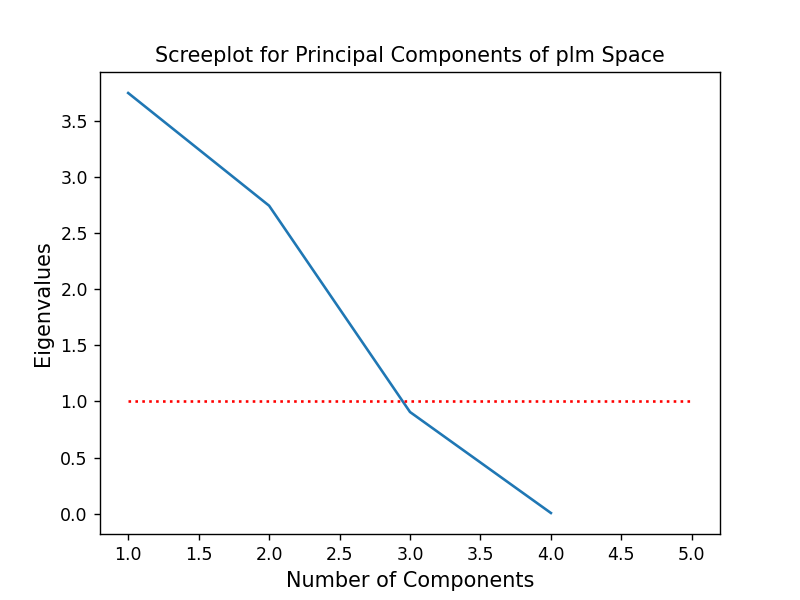

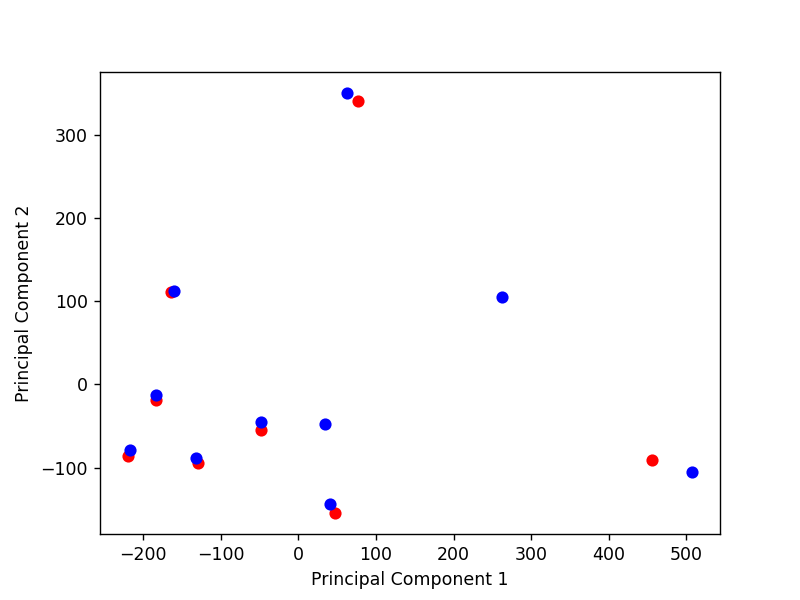

Running Constella...
18 plms to group


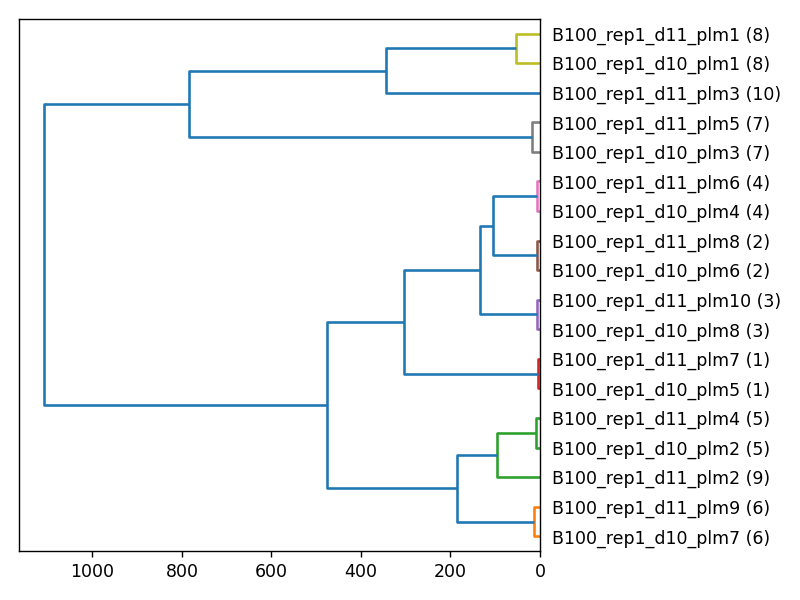

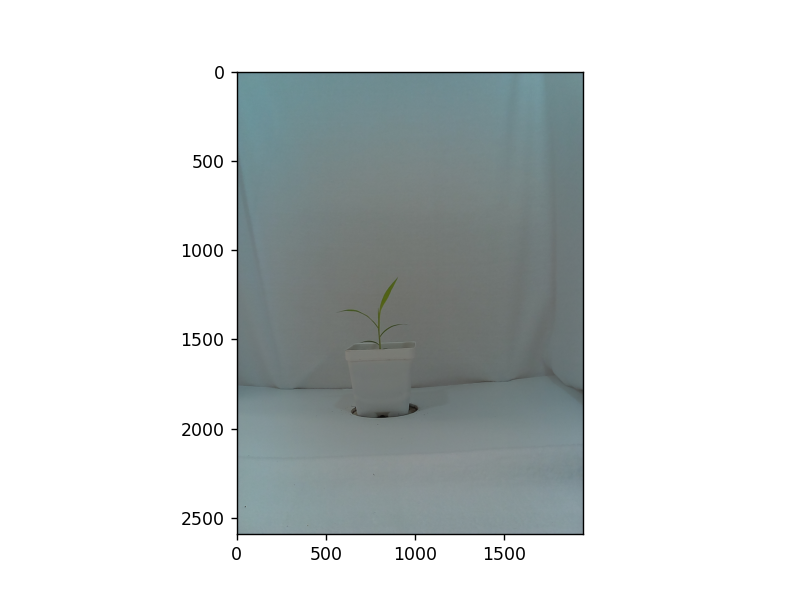

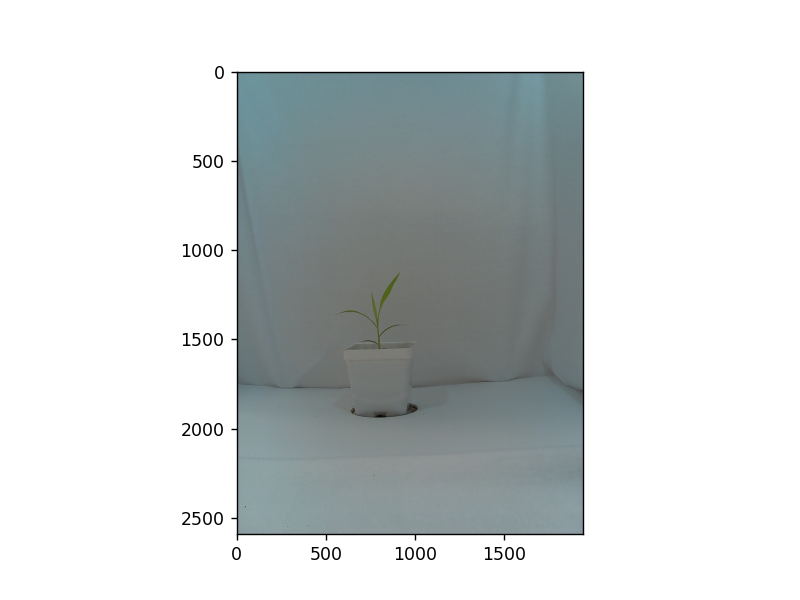

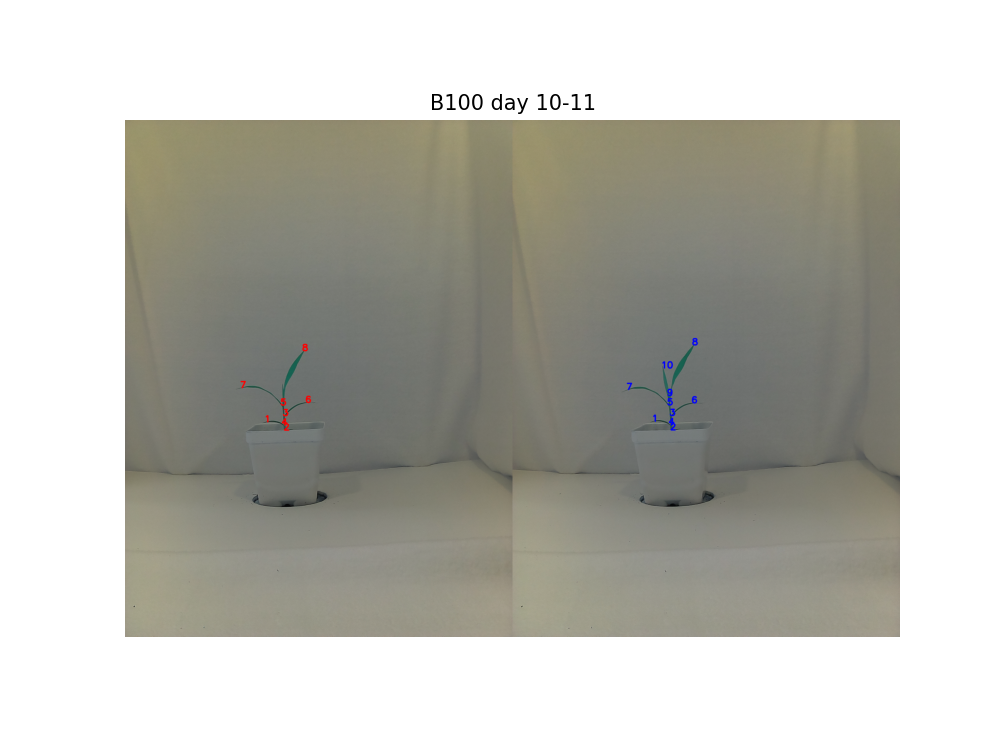

######################################################
Beginning next iteration for days 11 and 12
Running StarScape...
Eigenvalues:  [3.36317917 3.08498268 0.9288372  0.00599763] 


Var. Explained:  [0.45516711 0.41751645 0.12570729 0.00081171] 


Cumul. Var. Explained:  [0.45516711 0.87268356 0.99839085 0.99920256] 


2  components sufficiently informative


/var/folders/w8/r9_f9vbx64x2_6pgqn8mdm9r0000gn/T/ipykernel_53822/1117738285.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cur_plms = cur_plms.append(landmark_pandas[filenames == groupB])


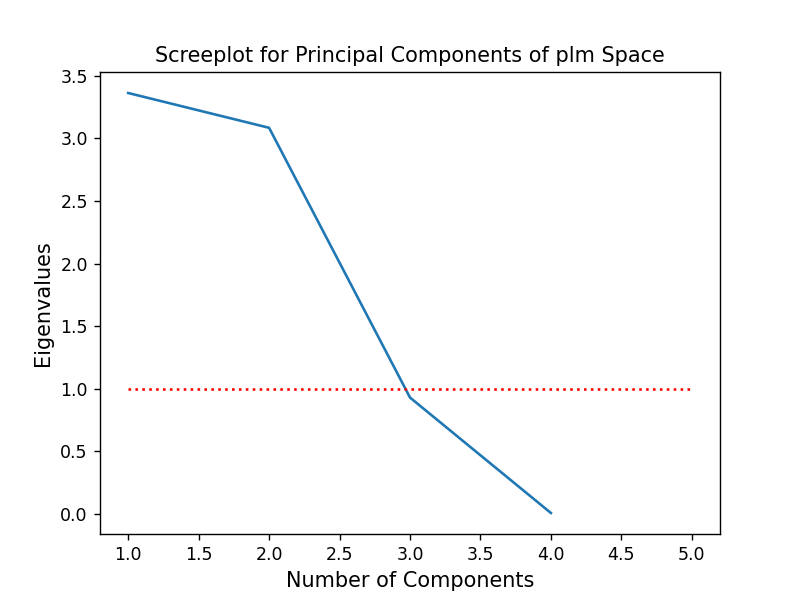

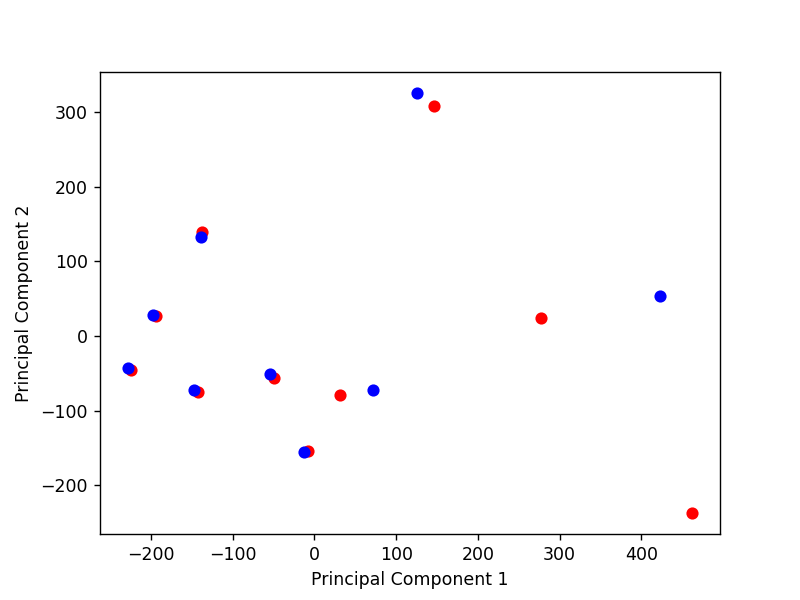

Running Constella...
19 plms to group


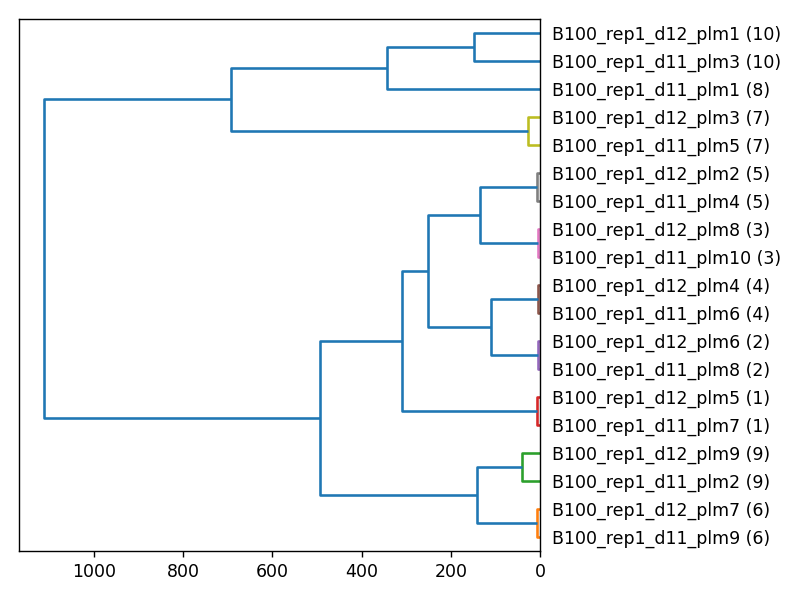

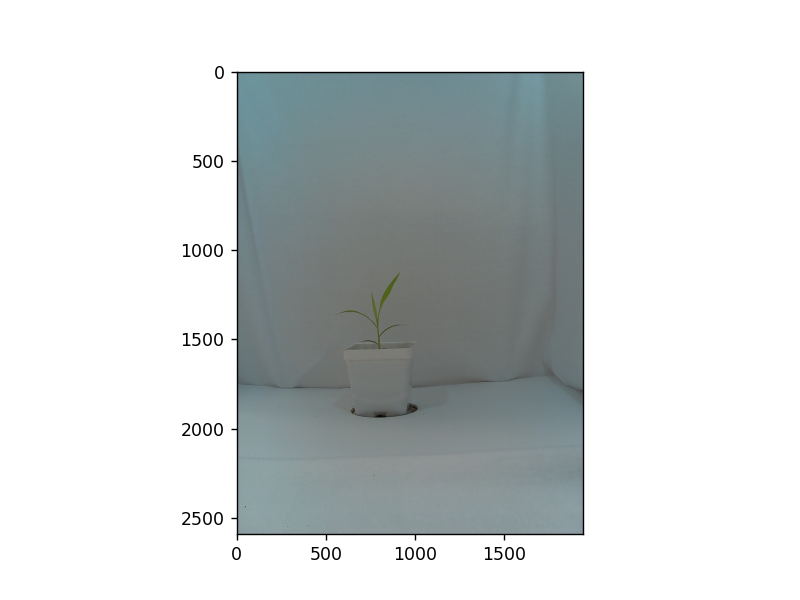

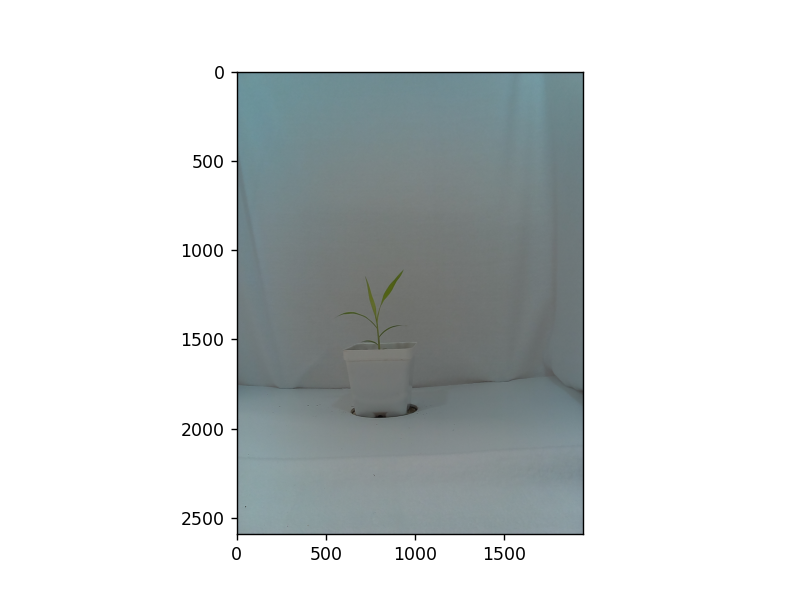

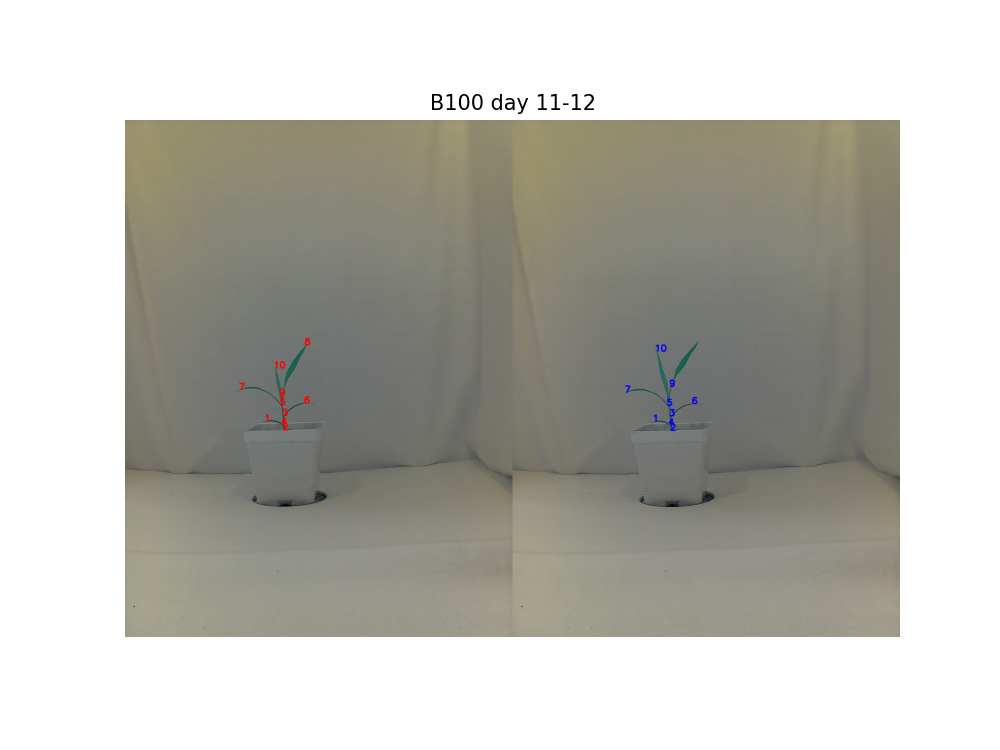

######################################################
Beginning next iteration for days 12 and 13
Running StarScape...
Eigenvalues:  [3.5180159  2.97607038 0.93492226 0.00403565] 


Var. Explained:  [0.47301054 0.40014392 0.12570383 0.00054261] 


Cumul. Var. Explained:  [0.47301054 0.87315446 0.99885829 0.9994009 ] 


2  components sufficiently informative


/var/folders/w8/r9_f9vbx64x2_6pgqn8mdm9r0000gn/T/ipykernel_53822/1117738285.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cur_plms = cur_plms.append(landmark_pandas[filenames == groupB])


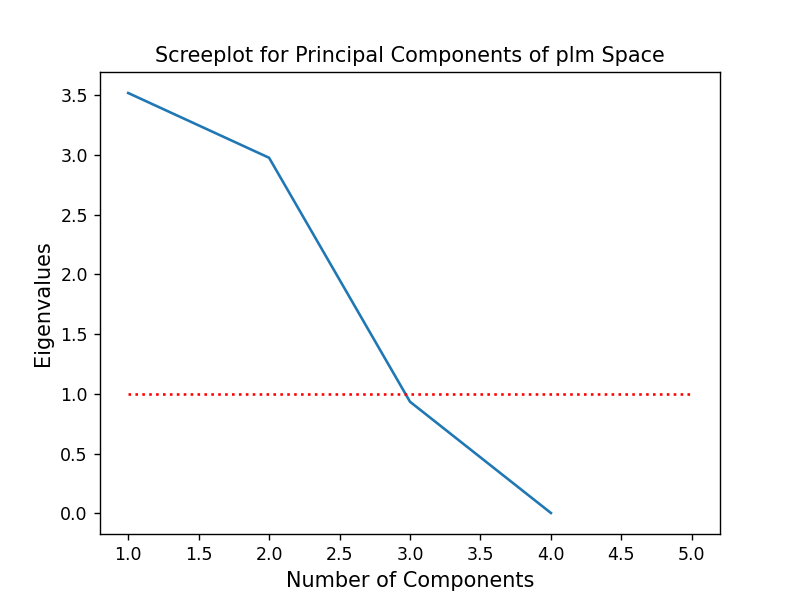

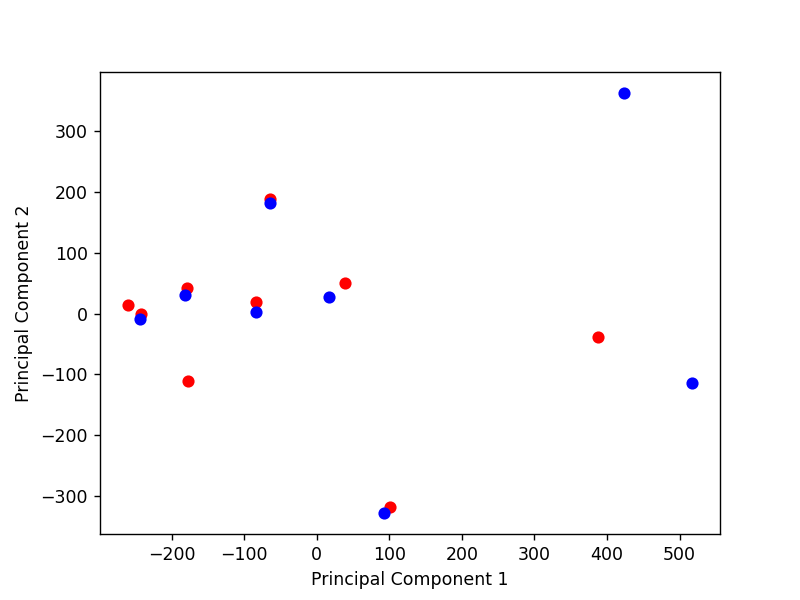

Running Constella...
17 plms to group


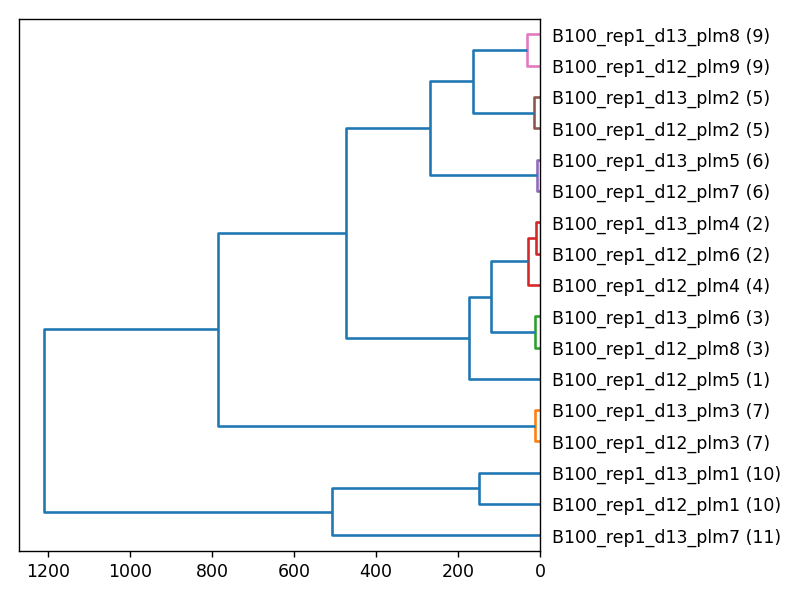

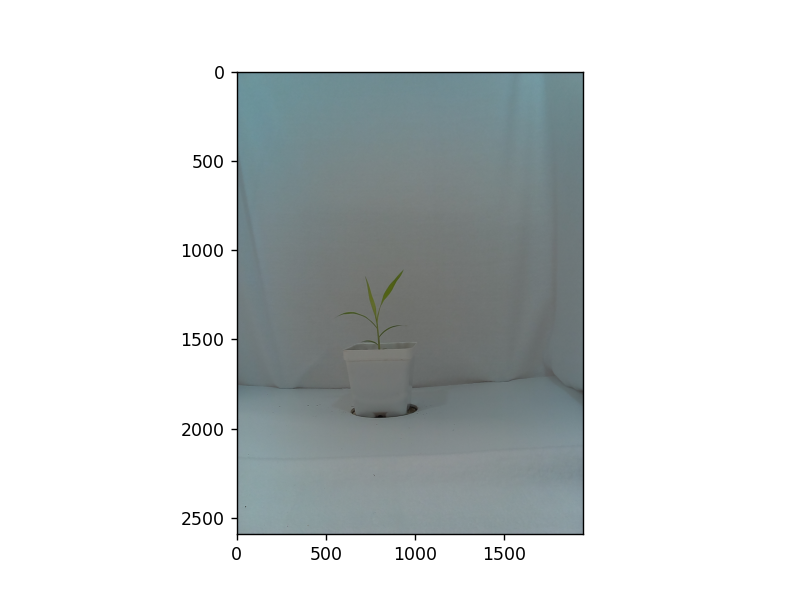

/Users/nfahlgren/GitHub/plantcv/plantcv/plantcv/plot_image.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


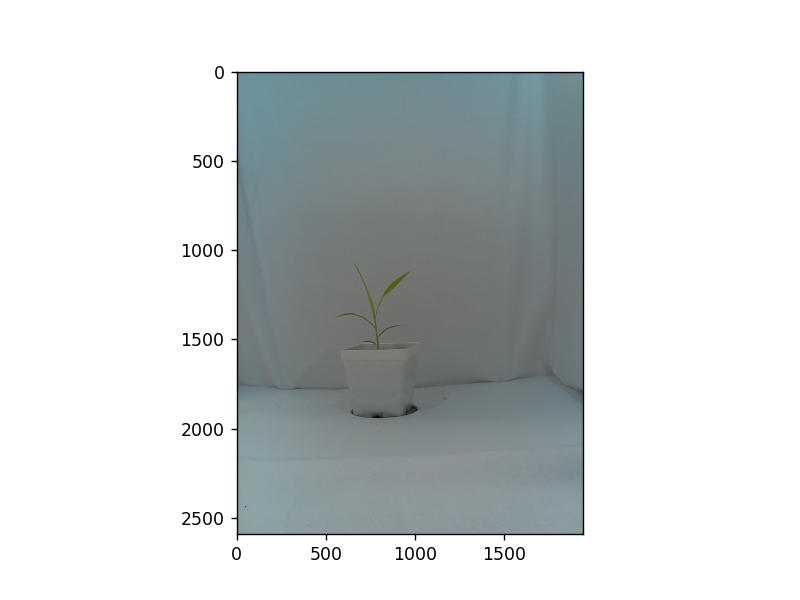

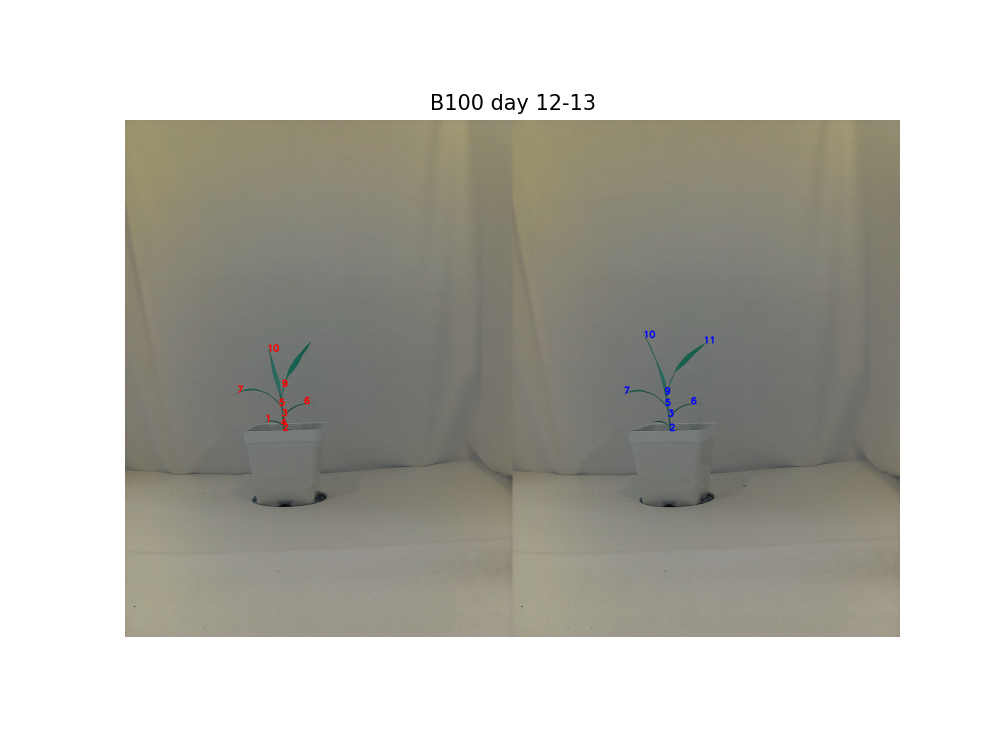

In [7]:
group_iter = 1
# Get all the filenames from the dataframe for filtering
filenames = landmark_pandas.loc[:,['filename']].values
# Loop over the days we defined above
for day in days[:-1]:
    # Iteration is between day and day + 1
    print("######################################################")
    print(f'Beginning next iteration for days {day} and {day + 1}')
    
    # Current data frame of pseudo-landmarks from the pair of day and day + 1
    groupA = f"{name_prefix}{day}"
    groupB = f"{name_prefix}{day + 1}"
    cur_plms = landmark_pandas[filenames == groupA]
    cur_plms = cur_plms.append(landmark_pandas[filenames == groupB])
    cur_plms = cur_plms.reset_index(drop=True)
    
    print('Running StarScape...')
    finalDf, eigenvals, loadings = pcv.homology.starscape(cur_plms=cur_plms, group_a=groupA, group_b=groupB, outfile_prefix=f"{outfile_prefix}_{day}")
    
    print('Running Constella...')
    cur_plms, group_iter = pcv.homology.constella(cur_plms=cur_plms, pc_starscape=finalDf, group_iter=group_iter, outfile_prefix=f"{outfile_prefix}_{day}")
    
    plmnames = landmark_pandas.loc[:,['plmname']].values
    cur_plmnames = cur_plms.loc[:,['plmname']].values
    
    for name in cur_plmnames:
        landmark_index = [i for i, x in enumerate(plmnames == name) if x]
        cur_plms_index = [i for i, x in enumerate(cur_plmnames == name) if x]
        if landmark_pandas.iloc[landmark_index, 0].values == None:
            landmark_pandas.iloc[landmark_index, 0] = cur_plms.iloc[cur_plms_index, 0]
    
    img1, _, _ = pcv.readimage(filename=os.path.join(path, f"{name_prefix}{day}.jpg"))
    
    for p in range(0, cur_plms.shape[0]):
        if f"{name_prefix}{day}" in cur_plms.at[p, 'plmname']:        
            cv2.putText(img1, str(cur_plms.at[p, 'group']), 
                        (int(cur_plms.at[p, 'plm_x'])-10, int(cur_plms.at[p, 'plm_y'])), 
                        cv2.FONT_ITALIC, 1.5, (255,0,0), 6)
    
    img2, _, _ = pcv.readimage(filename=os.path.join(path, f"{name_prefix}{day + 1}.jpg"))

    for p in range(0, cur_plms.shape[0]):
        if f"{name_prefix}{day + 1}" in cur_plms.at[p, 'plmname']:        
            cv2.putText(img2, str(cur_plms.at[p, 'group']), 
                        (int(cur_plms.at[p, 'plm_x'])-10, int(cur_plms.at[p, 'plm_y'])), 
                        cv2.FONT_ITALIC, 1.5, (0,0,255), 6)
    img_neighbors = cv2.hconcat((img1, img2))

    plm_groups_fig=plt.figure(figsize=(8, 6))
    plm_groups_fig=plt.imshow(img_neighbors)
    plm_groups_fig=plt.xscale('linear')
    plm_groups_fig=plt.axis('off')
    plm_groups_fig=plt.title(f'B100 day {day}-{day + 1}')
    plt.show(plm_groups_fig)
    

With the homology grouping workflow now completed a decent array of graphical outputs should be visible above displaying not only our PCA related graphs and the dendrogram used for our hierarchical clustering at each step, but also side by side images of our plants as well as their labeled homology groups to enable for easy point of reference for calling accuracy.  Let's have a look at our de novo homology groups on our original `landmark_pandas` dataframe, this time we'll have a look at the full table though instead of just taking a quick glance at the head.


In [8]:
landmark_pandas

group              plmname       filename  plm_x  plm_y  SS_x  SS_y  TS_x  \
0      8   B100_rep1_d10_plm1  B100_rep1_d10    898   1156   888  1178   881   
1      5   B100_rep1_d10_plm2  B100_rep1_d10    789   1429   791  1406   775   
2      7   B100_rep1_d10_plm3  B100_rep1_d10    587   1342   610  1336   611   
3      4   B100_rep1_d10_plm4  B100_rep1_d10    794   1528   797  1513   786   
4      1   B100_rep1_d10_plm5  B100_rep1_d10    709   1513   733  1509   732   
5      2   B100_rep1_d10_plm6  B100_rep1_d10    805   1554   796  1531   803   
6      6   B100_rep1_d10_plm7  B100_rep1_d10    914   1416   891  1421   891   
7      3   B100_rep1_d10_plm8  B100_rep1_d10    800   1482   814  1464   797   
8      8   B100_rep1_d11_plm1  B100_rep1_d11    910   1127   901  1149   893   
9      9   B100_rep1_d11_plm2  B100_rep1_d11    785   1381   792  1358   783   
10    10   B100_rep1_d11_plm3  B100_rep1_d11    755   1243   762  1266   756   
11     5   B100_rep1_d11_plm4  B100_rep1_d11    785   1428   783  1404   770   
12     7   B100_rep1_d11_plm5  B100_rep1_d11    581   1351   603  1342   604   
13     4   B100_rep1_d11_plm6  B100_rep1_d11    792   1526   792  1511   780   
14     1   B100_rep1_d11_plm7  B100_rep1_d11    709   1510   733  1506   732   
15     2   B100_rep1_d11_plm8  B100_rep1_d11    800   1553   793  1530   800   
16     6   B100_rep1_d11_plm9  B100_rep1_d11    907   1418   884  1424   883   
17     3  B100_rep1_d11_plm10  B100_rep1_d11    797   1481   809  1466   793   
18    10   B100_rep1_d12_plm1  B100_rep1_d12    723   1159   732  1180   727   
19     5   B100_rep1_d12_plm2  B100_rep1_d12    782   1431   781  1407   767   
20     7   B100_rep1_d12_plm3  B100_rep1_d12    573   1365   594  1355   595   
21     4   B100_rep1_d12_plm4  B100_rep1_d12    791   1529   791  1512   780   
22     1   B100_rep1_d12_plm5  B100_rep1_d12    713   1510   737  1507   737   
23     2   B100_rep1_d12_plm6  B100_rep1_d12    800   1555   792  1532   799   
24     6   B100_rep1_d12_plm7  B100_rep1_d12    908   1422   885  1427   884   
25     3   B100_rep1_d12_plm8  B100_rep1_d12    795   1483   808  1469   792   
26     9   B100_rep1_d12_plm9  B100_rep1_d12    797   1335   793  1357   779   
27    10   B100_rep1_d13_plm1  B100_rep1_d13    666   1090   679  1109   677   
28     5   B100_rep1_d13_plm2  B100_rep1_d13    774   1431   772  1408   757   
29     7   B100_rep1_d13_plm3  B100_rep1_d13    568   1370   589  1360   591   
30     2   B100_rep1_d13_plm4  B100_rep1_d13    796   1556   785  1534   794   
31     6   B100_rep1_d13_plm5  B100_rep1_d13    904   1423   881  1427   880   
32     3   B100_rep1_d13_plm6  B100_rep1_d13    789   1485   801  1471   785   
33    11   B100_rep1_d13_plm7  B100_rep1_d13    968   1118   952  1136   947   
34     9   B100_rep1_d13_plm8  B100_rep1_d13    773   1373   781  1351   770   

    TS_y    CC_ratio  
0   1173  255.000000  
1   1411    0.000000  
2   1339  255.000000  
3   1522    0.000000  
4   1511  255.000000  
5   1531  255.000000  
6   1419  255.000000  
7   1459    0.000000  
8   1144  255.000000  
9   1357    0.000000  
10  1267  255.000000  
11  1410    0.000000  
12  1346  255.000000  
13  1519    0.000000  
14  1509  255.000000  
15  1530  255.000000  
16  1421  255.000000  
17  1460    0.000000  
18  1183  255.000000  
19  1413    0.000000  
20  1358  255.000000  
21  1521    0.000000  
22  1510  255.000000  
23  1532  255.000000  
24  1424  255.000000  
25  1463    0.000000  
26  1357   49.418605  
27  1111  255.000000  
28  1414    0.000000  
29  1364  255.000000  
30  1533  255.000000  
31  1424  255.000000  
32  1465    0.000000  
33  1129  255.000000  
34  1349    0.000000

We see group serial numbers 1-10 repeating once for each frame so it appears things ran pretty well! Moreover, when we glance at the side-by-side images with the serial numbers superimposed onto the original images things look like they're grouping as we'd expect.  

However, as with all de novo methods there is the possibility for errors to be introduced which we might miss at a glance.  This brings us to a key aspect of our plm workflow when scaling up to a full sized project which is Quality Control (QC) assessment of our de novo homologies.  This is often done with a reduced subset of our full dataset in order to give us a general idea of the overall accuracy of our calls.  Although there is currently one method of producing input `starscape` files to feeding to `constella` eventually as other ways to rescale our `acute` outputs are developed this method can provide a helpful means of comparing what method of metadata generation (plmSpace) and multivariate space transformation (`starscape`) is the best for maximizing biologically informative signal.  With this being said let's begin by loading in a table of our landmarks which have been annotated to represent the biological structures they represent*.

*Although not seen in this situation it is common practice to denote random plms which don't represent any meaningful features as '-'.*


In [9]:
landmark_feat_standards = pd.read_csv('B100_timeseries_test_plms_annotated.csv')
landmark_feat_standards.head(10)

group             plmname       filename  plm_x  plm_y  SS_x  SS_y  TS_x  \
0    leaf5  B100_rep1_d10_plm1  B100_rep1_d10    901   1151   892  1173   885   
1  ligule4  B100_rep1_d10_plm2  B100_rep1_d10    787   1425   789  1401   773   
2    leaf4  B100_rep1_d10_plm3  B100_rep1_d10    571   1344   594  1338   595   
3  ligule2  B100_rep1_d10_plm4  B100_rep1_d10    793   1523   796  1511   783   
4    leaf2  B100_rep1_d10_plm5  B100_rep1_d10    712   1511   736  1508   736   
5     base  B100_rep1_d10_plm6  B100_rep1_d10    803   1555   795  1533   807   
6    leaf3  B100_rep1_d10_plm7  B100_rep1_d10    922   1415   898  1420   898   
7  ligule3  B100_rep1_d10_plm8  B100_rep1_d10    803   1478   816  1459   801   
8    leaf5  B100_rep1_d11_plm1  B100_rep1_d11    912   1123   904  1146   895   
9  ligule5  B100_rep1_d11_plm2  B100_rep1_d11    786   1370   794  1347   784   

   TS_y    CC_ratio  
0  1167  255.000000  
1  1405    6.219512  
2  1342  255.000000  
3  1519   18.888889  
4  1512  255.000000  
5  1532  255.000000  
6  1416  255.000000  
7  1454   12.207447  
8  1139  255.000000  
9  1346    0.000000

After glancing at the table above we essentially have 3 types of features we're classifying, our leaf tips denoted as 'leaf', our axils where leaf blades attach to the stem as 'ligule' (common term for this feature in grasses), and 'base' which represents the bottom landmark at the base of our plant.  Now we have a list of known features which we can compare to our corresponding list of our predicted homology groups.


In [10]:
pcv.homology.constellaqc(denovo_groups=landmark_pandas, annotated_groups=landmark_feat_standards)

Known Feature-Predicted Group Scoring Matrix:

         1   2   3   4   5   6   7   8   9   10  11
base      0   2   1   0   0   0   0   0   0   0   1
leaf2     2   0   1   0   0   1   0   0   0   0   0
leaf3     0   0   0   0   0   2   0   0   2   0   0
leaf4     1   1   0   0   0   0   2   0   0   0   0
leaf5     0   0   0   0   0   0   0   2   0   1   0
leaf6     0   0   0   0   1   0   1   0   0   1   0
ligule2   0   1   0   2   0   1   0   0   0   0   0
ligule3   0   0   2   0   0   0   0   0   0   1   0
ligule4   0   0   0   1   2   0   1   0   0   0   0
ligule5   0   0   0   0   1   0   0   0   1   0   0


Valid Call Rate:      22.5 %
Splitting Call Rate:  40.0 %
Clumping Call Rate:   37.5 %


And there we have it! As expected the valid calls were perfect within this tutorial although error, and importantly the type of error is important to keep track of when developing this workflow for your own research.  To provide a bit of context let's discuss what our two sources of error represent.

## Splitting Error

Splitting errors are essentially calls in which more than one de novo homology group was generated to represent a single, known, feature.  Within this workflow these errors are often considered less egregious given that they can easily be reconciled together during manual curation of homology groups prior to using plm homology groups for morphometric analyses.  A good analogy to this problem is that of scaffold generation during whole genome sequencing in which often only fragments of rather than complete chromosomes are reconstructed from the data.  This issue is easily reconciled by a user specifying that these two scaffolds belong together and manually assigning linkage based on known attributes of this data which exist beyond the capacity of the de novo assembler.  In a similar vein of logic, if a leaf tip is broken into two groups it can easily be tied together as these groups are given a biologically relevant name.

## Clumping Error

Clumping errors by contrast are calls in which multiple known features are linked together under a single de novo homology group.  Understandably this error is considered far more troubling and all efforts in designing this workflow have been to drive this error rate as low as possible (in most cases hovering in the 5% range for true experimental data).  Often datasets which have a high degree of parallax (possessing perspective related artifacts of compressing 3-dimensional structures into a 2-dimensional frame) tend to drive up this error rate.  It is often best to check this error rate under a reduced dataset of each genotype or environmental treatment that is anticipated to be used given that it can provide a user with an overall grasp of how well Constella's de novo assignments work within this pool of the data.  Cases in which clumping error rates are higher may require a more stringent round of manual curration in order to ensure that morphometric analyses performed on this data afterwards are meaningful.


# In Conclusion

And there you have it! We've successfully started with a handful of time series images and learned how to prepare binary masks which can be used for acute in Tutorial 1.  We then learned in Tutorial 2 how to scale up what we had learned in our first exercise to work on batch image datasets. Following the generation of this batch plm data we were then able to explore de novo homology grouping through the use of our StarScape & Constella pipeline in Tutorial 3. And finally in our last exercise we again scaled up what we learned for homology grouping on to batch datasets then were able to test what we generated using ConstellaQC in order to get a general idea of how much confidence we can have in our calls.  

I hope this tutorial series have been informative and provides you with some quick-start code to get your own projects running. Cheers!